# Phase 1 Milestone 1

## Perkenalan
Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Raden Mas Xyla Ramadhan

Batch : 13


**Data Set :** credit_card_default from Google Cloud Platform

**Objective :**
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

**Query**

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 

FROM `bigquery-public-data.ml_datasets.credit_card_default` 

/* batch 13 kelahiran 1997 ..  13*1997 = 25961 */

LIMIT 25961

## Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import pickle

## Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
#DataSet Loading
data = pd.read_csv('h8dsft_P1M1_dataset_xyla_ramadhan.csv')
#Displaying DataFrame
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [3]:
#Checking information on DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

24 kolom termasuk int(64) namun sex, education level marital status age pay_0,2,3,4,5,6 dan default_payment_next_month merupakan kategorical column

Keterangan dari kolom dataset ini adalah:

| Feature             | Description|
| --------------      | ---------- |
| limit_balance       | Amount of given credit in NT (New Taiwan) dollars (includes individual and family/supplementary credit       
| sex                 | Gender (1=male, 2=female)  
| education_level     | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
| marital_status      | Marital status (1=married, 2=single, 3=others) 
| age                 | Age in years
| pay_0               | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
| pay_2               | Repayment status in August, 2005 (scale same as above)
| pay_3               | Repayment status in July, 2005 (scale same as above)
| pay_4               | Repayment status in June, 2005 (scale same as above) 
| pay_5               | Repayment status in May, 2005 (scale same as above)
| pay_6               | Repayment status in April, 2005 (scale same as above)
| bill_amt_1          | Amount of bill statement in September, 2005 (NT dollar)
| bill_amt_2          | Amount of bill statement in August, 2005 (NT dollar)
| bill_amt_3          | Amount of bill statement in July, 2005 (NT dollar)
| bill_amt_4          | Amount of bill statement in June, 2005 (NT dollar)
| bill_amt_5          | Amount of bill statement in May, 2005 (NT dollar)
| bill_amt_6          | Amount of bill statement in April, 2005 (NT dollar)
| pay_amt_1           | Amount of previous payment in September, 2005 (NT dollar)
| pay_amt_2           | Amount of previous payment in August, 2005 (NT dollar)
| pay_amt_3           | Amount of previous payment in July, 2005 (NT dollar)
| pay_amt_4           | Amount of previous payment in June, 2005 (NT dollar)
| pay_amt_5           | Amount of previous payment in May, 2005 (NT dollar)
| pay_amt_6           | Amount of previous payment in April, 2005 (NT dollar)
|default_payment_next_month| Default payment (1=yes, 0=no)


                                                                                       

In [4]:
#Checking description of DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Insight yang didapat 

- umur termuda di umur 21 tahun dan umur tertua pada umur 69 tahun 
- tagihan terbesar adalah 613860 dan tagihan terendah adalah -73895
- pembyaran terbesar adalah 1227082 dan pembayaran terendah adalah 0

Check Missing Value

In [5]:
#Checking Missing Value
data.isnull().sum().sum()

0

## Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Data Korelasi

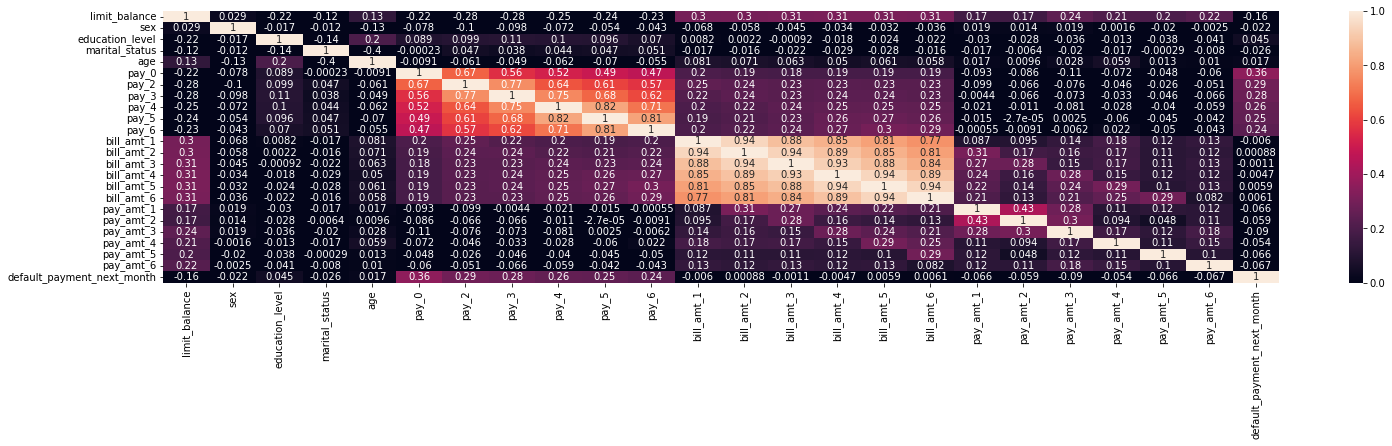

In [6]:
#Melihat correlasi dalam DataSet
corr = data.corr()


#Code untuk menampilkan heatmap correlation
plt.figure(figsize=(25,5))
sns.heatmap(data.corr(), vmin=0, vmax=1,annot=True)
plt.show()

Di sini bisa dilihat bahwa korelasi setiap kolom dengan kolom lainnya. 
Saya dapat melihat bahwa 

kolom pay_0,2,3,4,5,6 memiliki korelasi dengan kolom pay_0,2,3,4,5,6 dengan range    0.46 sampai 0.81

kolom pay_0,2,3,4,5,6 memiliki korelasi dengan kolom bill_amt_1,2,3,4,5,6 dengan range 0.20 sampai 0.29

kolom pay_0,2,3,4,5,6 memiliki korelasi dengan kolom pay_amt_1,2,3,4,5,6 dengan range -0.105 sampai -0.201

kolom bill_amt_1,2,3,4,5,6 memiliki korelasi dengan kolom bill_amt_1,2,3,4,5,6 dengan range 0.77 sampai 0.94

kolom bill_amt_1,2,3,4,5,6 memiliki korelasi dengan kolom pay_amt_1,2,3,4,5,6 dengan range 0.08 sampai 0.30

kolom pay_amt_1,2,3,4,5,6 memiliki korelasi dengan kolom pay_amt_1,2,3,4,5,6 dengan range  0.04 sampai 0.426

default_payment_next_month memiliki korelasi dengan kolom pay_0,2,3,4,5,6 dengan range 0.23 sampai 0.35 

dari korelasi tabel diatas saya dapat menyimpulkan bahwa 

- kolom pay_... memiliki korelasi yang kuat dengan kolom pay_... karena isinya hanya berupa deskripsi status(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- kolom bill_... memiliki korelasi yang kuat dengan kolom bill_... karena isinya merupakan tagihan perbulan oleh karena itu jarak perbulan semakin dekat semakin besar

- namun kolom pay_amt.. tidak memiliki korelasi yang kuat dengan kolom pay_amt.. 
karena isi nya merupakan pembayaran, dan pembayaran dilakukan sesuai kemampuan para nasabah

- default_payment_next_month memiliki korelasi yang kuat dengan kolom pay_0 karena isi nya berupa boolean 0 atau 1 dan kolom pay_0 berisi deskripsi status (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above).

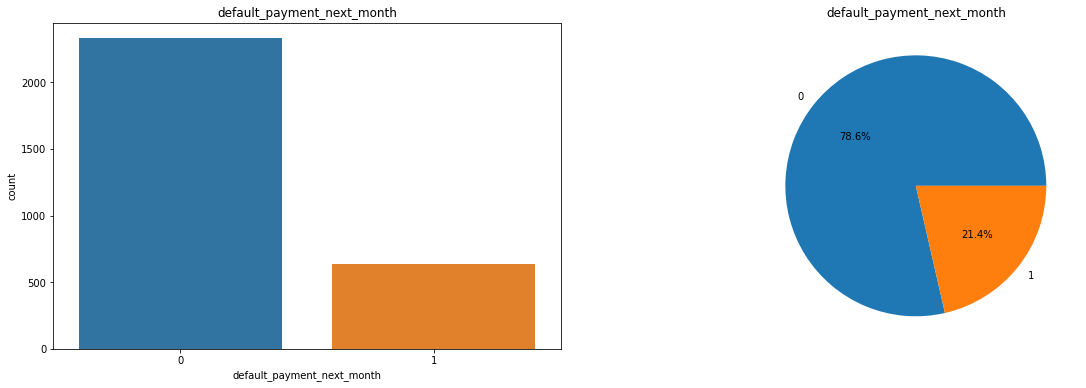

In [7]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='default_payment_next_month', data=data)
plt.title('default_payment_next_month')
plt.subplot(1, 2, 2)
plt.pie(data.groupby('default_payment_next_month').size(), labels=data.groupby('default_payment_next_month').size().index, autopct='%1.1f%%')
plt.title('default_payment_next_month')
plt.show()

Untuk default_payment_next_month, saya dapat melihat bahwa hanya ada 2 'opsi' yaitu 0 = Tidak dan 1 = Ya

presentase default payment dengan 78.6% nya adalah 0 (no) dan 21.4% nya adalah 1 (yes).

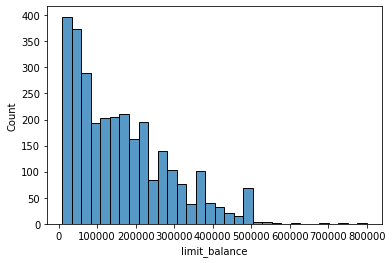

In [8]:
ax = sns.histplot(x="limit_balance", data=data)


Untuk limit balance, saya dapat melihat bahwa kebanyakan orang memiliki limit di bawah 100.000. karena data tersebut ingin mengetahui apakah seseorang akan membayar tagihannya bulan depan.

Dengan saldo batas bawah, saya dapat menyimpulkan bahwa mereka memiliki gaji yang masih rendah membuat beberapa dari mereka tidak dapat membayar semua tagihan mereka.

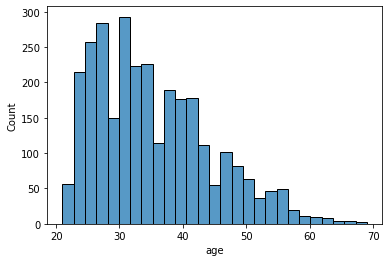

In [9]:
ax = sns.histplot(x="age", data=data)

Dari grafik di atas, dari rentang usia di dataset ini dapat dilihat bahwa mayoritas di Data Set adalah orang-orang berusia 20-35 tahun

Dari situ saya dapat menganalisis bahwa rata-rata kebanyakan orang memiliki pekerjaan yang memastikan bahwa mereka mampu membayar tagihan mereka pada akhirnya

Berbeda dengan lansia, di mana mereka mungkin mengandalkan dana pensiun mereka untuk membayar tagihan mereka

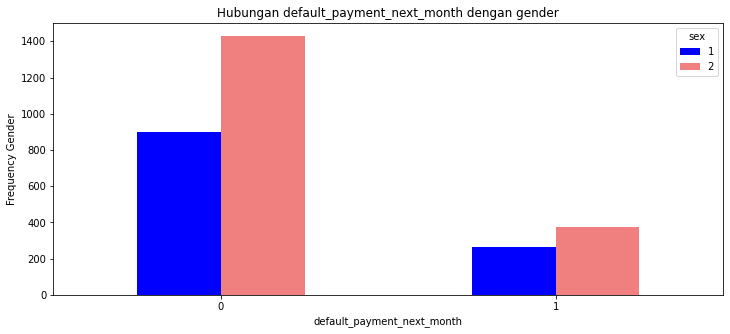

In [10]:
pd.crosstab(data.default_payment_next_month, data.sex).plot(kind="bar",figsize=(12,5),color=['blue','lightcoral'])
plt.title('Hubungan default_payment_next_month dengan gender')
plt.xlabel('default_payment_next_month')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Gender')
plt.show()

Gender (1=male, 2=female)  

Dari grafik di atas saya bisa menyimpulkan bahwa wanita lebih sering menggunakan kartu kredit daripada pria

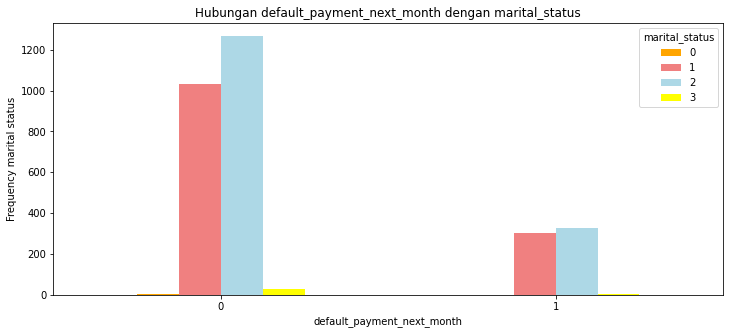

In [11]:
pd.crosstab(data.default_payment_next_month, data.marital_status).plot(kind="bar",figsize=(12,5),color=['orange','lightcoral','lightblue','yellow'])
plt.title('Hubungan default_payment_next_month dengan marital_status')
plt.xlabel('default_payment_next_month')
plt.xticks(rotation = 0)
plt.ylabel('Frequency marital status')
plt.show()



Marital status (1=married, 2=single, 3=others) 

Dari grafik di atas, bisa disimpulkan bahwa orang yang belum menikah (single) lebih banyak menggunakan kartu kredit daripada yang sudah menikah


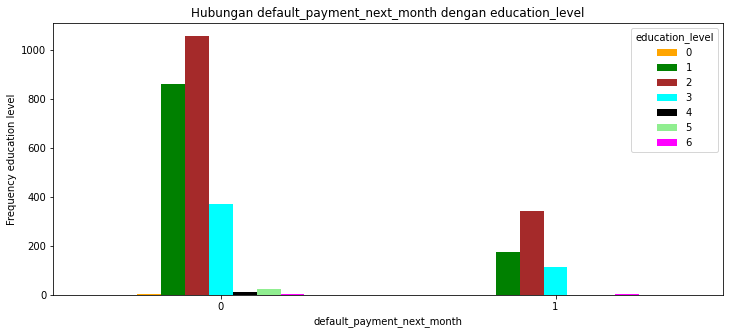

In [12]:
pd.crosstab(data.default_payment_next_month, data.education_level).plot(kind="bar",figsize=(12,5),color=['orange','green','brown','cyan','black','lightgreen','magenta'])
plt.title('Hubungan default_payment_next_month dengan education_level')
plt.xlabel('default_payment_next_month')
plt.xticks(rotation = 0)
plt.ylabel('Frequency education level')
plt.show()

Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  



Dari grafik di atas, bisa disimpulkan bahwa Lulusan S1 (univesity) lebih sering menggunakan kartu kredit daripada Lulusan S2 atau SMA


## Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Model Inference

In [13]:
#Get Data for Model Inference
data_inf = data.sample(10, random_state=31)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1338,80000,2,1,2,28,0,0,0,2,2,...,35740,32684,32605,1955,3681,1300,0,1500,1200,0
1124,30000,2,2,1,26,2,0,0,0,0,...,18669,15710,15308,1700,1600,700,1401,0,600,1
2504,130000,1,2,2,33,1,-1,0,-1,0,...,11,1011,381,870,300,11,1000,300,500,0
1414,50000,2,2,2,32,0,0,2,2,2,...,45795,44929,48179,4000,0,3400,0,4000,0,1
1484,80000,1,2,2,30,0,0,2,-1,-1,...,61302,0,0,33000,56,62877,0,41150,81000,0
1717,390000,2,1,2,27,2,2,0,0,0,...,374302,395430,384825,0,16000,15000,29000,0,12000,1
57,70000,1,1,2,31,0,0,0,0,0,...,63341,64694,67905,6000,5000,10000,3000,5000,3000,0
940,150000,2,2,2,25,0,0,0,0,0,...,103062,83567,85098,5000,3500,3000,3000,3100,3100,0
959,370000,1,1,2,30,0,0,0,0,0,...,295747,250158,255956,13000,11000,15000,10000,10000,12000,0
306,210000,2,1,2,26,0,0,0,0,0,...,18915,19359,21604,3487,10000,2000,1000,3000,1000,0


In [14]:
#Remove Inference Set
data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [15]:
#Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,2,1,2,28,0,0,0,2,2,...,35740,32684,32605,1955,3681,1300,0,1500,1200,0
1,30000,2,2,1,26,2,0,0,0,0,...,18669,15710,15308,1700,1600,700,1401,0,600,1
2,130000,1,2,2,33,1,-1,0,-1,0,...,11,1011,381,870,300,11,1000,300,500,0
3,50000,2,2,2,32,0,0,2,2,2,...,45795,44929,48179,4000,0,3400,0,4000,0,1
4,80000,1,2,2,30,0,0,2,-1,-1,...,61302,0,0,33000,56,62877,0,41150,81000,0
5,390000,2,1,2,27,2,2,0,0,0,...,374302,395430,384825,0,16000,15000,29000,0,12000,1
6,70000,1,1,2,31,0,0,0,0,0,...,63341,64694,67905,6000,5000,10000,3000,5000,3000,0
7,150000,2,2,2,25,0,0,0,0,0,...,103062,83567,85098,5000,3500,3000,3000,3100,3100,0
8,370000,1,1,2,30,0,0,0,0,0,...,295747,250158,255956,13000,11000,15000,10000,10000,12000,0
9,210000,2,1,2,26,0,0,0,0,0,...,18915,19359,21604,3487,10000,2000,1000,3000,1000,0


### Check Missing Value

In [16]:
data_train_test.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak ada missing value dalam dataset

### Splitting Data

In [17]:
#Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('default_payment_next_month', axis=1) #axis=1 ==> column
y = data_train_test['default_payment_next_month']
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,...,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,...,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,...,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,...,22110,19837,19855,20151,1367,1606,692,709,721,692


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2364, 23)
Test Size:  (591, 23)


### Handling Outlier

In [19]:
# Making a function to visualize the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [20]:
# Looping to check the Distribution of each column
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [21]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['limit_balance', 'education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

Normal distribution : ['sex', 'marital_status']


karena kolom sex dan marital status merupakan categorical maka tidak perlu dihandling outliernya

In [22]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        text = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(text)

In [23]:
#Checking the outliers in the extreme range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=3)

{'Variable': 'limit_balance', 'Total Outliers': 2, 'Percentage': 0.08460236886632826}
{'Variable': 'education_level', 'Total Outliers': 3, 'Percentage': 0.12690355329949238}
{'Variable': 'age', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'pay_0', 'Total Outliers': 9, 'Percentage': 0.3807106598984772}
{'Variable': 'pay_2', 'Total Outliers': 11, 'Percentage': 0.4653130287648054}
{'Variable': 'pay_3', 'Total Outliers': 14, 'Percentage': 0.5922165820642978}
{'Variable': 'pay_4', 'Total Outliers': 15, 'Percentage': 0.6345177664974619}
{'Variable': 'pay_5', 'Total Outliers': 13, 'Percentage': 0.5499153976311337}
{'Variable': 'pay_6', 'Total Outliers': 10, 'Percentage': 0.4230118443316413}
{'Variable': 'bill_amt_1', 'Total Outliers': 58, 'Percentage': 2.4534686971235193}
{'Variable': 'bill_amt_2', 'Total Outliers': 58, 'Percentage': 2.4534686971235193}
{'Variable': 'bill_amt_3', 'Total Outliers': 65, 'Percentage': 2.7495769881556686}
{'Variable': 'bill_amt_4', 'Total Outliers': 59, '

In [24]:
#Checking the outliers in the normal range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=1.5)

{'Variable': 'limit_balance', 'Total Outliers': 12, 'Percentage': 0.5076142131979695}
{'Variable': 'education_level', 'Total Outliers': 33, 'Percentage': 1.3959390862944163}
{'Variable': 'age', 'Total Outliers': 25, 'Percentage': 1.0575296108291032}
{'Variable': 'pay_0', 'Total Outliers': 249, 'Percentage': 10.532994923857867}
{'Variable': 'pay_2', 'Total Outliers': 336, 'Percentage': 14.213197969543149}
{'Variable': 'pay_3', 'Total Outliers': 323, 'Percentage': 13.663282571912013}
{'Variable': 'pay_4', 'Total Outliers': 290, 'Percentage': 12.267343485617598}
{'Variable': 'pay_5', 'Total Outliers': 251, 'Percentage': 10.617597292724195}
{'Variable': 'pay_6', 'Total Outliers': 265, 'Percentage': 11.209813874788493}
{'Variable': 'bill_amt_1', 'Total Outliers': 179, 'Percentage': 7.571912013536379}
{'Variable': 'bill_amt_2', 'Total Outliers': 182, 'Percentage': 7.698815566835872}
{'Variable': 'bill_amt_3', 'Total Outliers': 185, 'Percentage': 7.825719120135363}
{'Variable': 'bill_amt_4', 

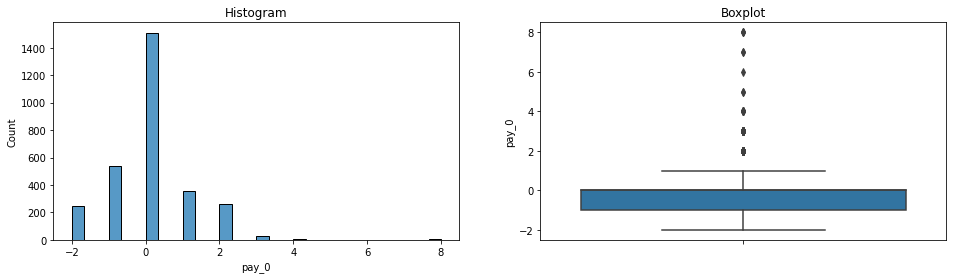

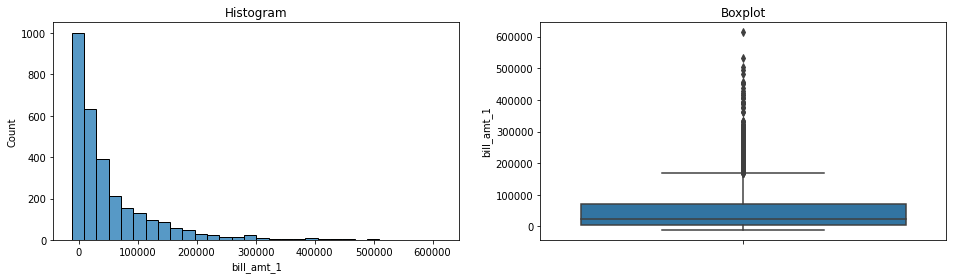

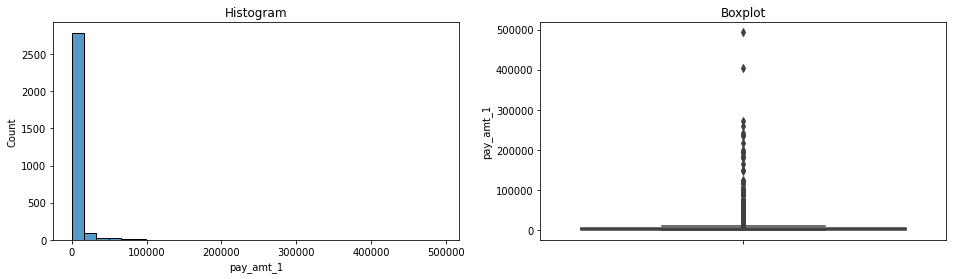

In [25]:
#Visualising the outliers
diagnostic_plots(data_train_test,'pay_0')
diagnostic_plots(data_train_test,'bill_amt_1')
diagnostic_plots(data_train_test,'pay_amt_1')

Dari fungsi dan grafik di atas, dapat saya simpulkan bahwa outlier paling banyak ada pada distribusi skewed. Tetapi karena data tentang keterlambatan pembayaran, jelas akan ada outlier karena beberapa orang tidak memiliki kekayaan untuk membayar tagihan tepat waktu yang menyebabkan pembayaran kosong untuk bulan-bulan tertentu, dan ketika mereka membayar bisa dalam jumlah besar atau diangsur (tergantung orangnya).

Pembayaran yang dilakukan setelah bulan pembayaran kosong, akan menjadi outlier. Itulah mengapa saya telah membuat keputusan untuk hanya menghapus extreme outlier nya saja

In [26]:
#Censoring
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=3, #In extreme range
                          variables=['limit_balance', 'education_level','age', 
                          'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
                          'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
                          'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4','pay_amt_5', 'pay_amt_6'])

windsoriser.fit(X_train)

X_train_cen = windsoriser.transform(X_train)

In [27]:
X_train_cen.isnull().sum().sum()

0

In [28]:
#Checking the information before censoring
print('Dataframe - Before Capping')
print(X_train.describe())

Dataframe - Before Capping
       limit_balance          sex  education_level  marital_status  \
count    2364.000000  2364.000000      2364.000000     2364.000000   
mean   162423.857868     1.601946         1.862098        1.558376   
std    126413.148389     0.489600         0.776573        0.522431   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    130000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2364.000000  2364.000000  2364.000000  2364.000000  2364.000000   
mean     35.312183     0.001269    -0.125212    -0.141709    -0.182741   
std       9.182580     1.113339     1.175454     1.182738     1.180146   
min      21.000000    -2.000000    -2.000000  

In [29]:
#Checking the information after censoring
print('Dataframe - After Capping')
print(X_train_cen.describe())

Dataframe - After Capping
       limit_balance          sex  education_level  marital_status  \
count    2364.000000  2364.000000      2364.000000     2364.000000   
mean   162406.937394     1.601946         1.860829        1.558376   
std    126330.087290     0.489600         0.770602        0.522431   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    130000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    770000.000000     2.000000         5.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2364.000000  2364.000000  2364.000000  2364.000000  2364.000000   
mean     35.312183    -0.010152    -0.134941    -0.155245    -0.199239   
std       9.182580     1.062132     1.137584     1.129009     1.109944   
min      21.000000    -2.000000    -2.000000   

bisa dilihat di tabel sebelum dilakukan windsoriser terlihat perubahan data max bill_amt_3 dari 578971 menjadi 239531 

### Feature Selection 

In [30]:
#Check X_train
X_train_cen.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1873,80000.0,1,1.0,1,41.0,3.0,2.0,2.0,2.0,2.0,...,8498.0,9155.0,8864.0,9215.0,1200.0,0.0,800.0,0.0,500.0,900.0
2234,170000.0,1,1.0,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,1012.0,0.0,0.0,0.0,0.0,1012.0,0.0,0.0,492.0
1085,100000.0,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,23837.0,24166.0,24216.0,24901.0,1372.0,1829.0,1554.0,1000.0,1000.0,586.0
1601,220000.0,1,2.0,2,31.0,1.0,2.0,0.0,0.0,0.0,...,179645.0,166753.0,82058.0,20650.0,0.0,6800.0,6640.0,4100.0,1100.0,0.0
2066,260000.0,2,1.0,2,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,1109.0,1181.0,-18.0,3791.0,132.0,1119.0,1186.0,18.0,3809.0,1917.0


untuk feature selection saya tidak akan drop kolom karena menurut saya semua kolom memiliki peran penting pay merupakan status bill_amt merupakan jumlah tagihan dan pay_amt merupakan jumlah pembayaran

### Feature Scaling

In [31]:
### Feature Scaling
scaler = MinMaxScaler()
scaler.fit(X_train_cen)

X_train_scaled  = scaler.transform(X_train_cen)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled

array([[9.21052632e-02, 0.00000000e+00, 2.00000000e-01, ...,
        0.00000000e+00, 3.31740977e-02, 5.80065096e-02],
       [2.10526316e-01, 0.00000000e+00, 2.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.17102253e-02],
       [1.18421053e-01, 1.00000000e+00, 4.00000000e-01, ...,
        6.64838361e-02, 6.63481953e-02, 3.77686829e-02],
       ...,
       [9.21052632e-02, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.81578947e-01, 0.00000000e+00, 2.00000000e-01, ...,
        1.44934763e-01, 4.27282378e-02, 6.44516774e-05],
       [5.26315789e-02, 1.00000000e+00, 6.00000000e-01, ...,
        1.08767556e-01, 9.95886412e-02, 1.09567852e-01]])

## Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

1. Lakukan model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang diminta.
2. Kemudian, gunakan `cross_val_score` untuk mencari akurasi `mean` dan `std` dari setiap model. 
3. Pilih agoritma yang terbaik dari hasil poin 2.
4. Lakukan Hyperparameter Tuning pada algoritma terbaik (berdasarkan poin 2) dengan menggunakan `GridSearchCV()`. 
5. Bandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning.

Untuk Model yang digunakan, saya menggunakan 7 model berbeda untuk menemukan hasil yang terbaik. 


In [32]:
#Logistic Regression
log_model = LogisticRegression()
#Support Vector Machine
svm_model = SVC()
#Decision Tree
dt_model = DecisionTreeClassifier()
#Random Forest
rf_model = RandomForestClassifier(random_state=31)
#alasan saya membuat random state agar jika model training 
#di run ulang tidak berubah akurasinya

#KNN
knn_model = KNeighborsClassifier()
#Naive Bayes
nb_model = GaussianNB()

### Other Algorithm ###

# GradientBoosting
gb_model = GradientBoostingClassifier()

### Cross Validation

In [33]:
# Cross-validation untuk base model

# Menyiapkan model dalam list
models = []
models.append(('log', log_model))
models.append(('svm', svm_model))
models.append(('dt', dt_model))
models.append(('rf', rf_model))
models.append(('knn', knn_model))
models.append(('nb', nb_model))
models.append(('gb', gb_model))

# Menyiapkan list kosong untuk wadah hasil cross validation
nama = []
hasil = []
mean_score = []
stdev_score = []
best_score = []


# Melakukan Cross Validation setiap model
for name, model in models:
    model.fit(X_train_scaled,y_train)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=5, n_jobs=-1)

    nama.append(name)
    hasil.append(scores)
    mean_score.append(round(np.mean(scores),5))
    stdev_score.append(round(np.std(scores),5))
    best = round(np.mean(scores),5) - round(np.std(scores),5)
    best_score.append(best)

cv_result = pd.DataFrame({'models':nama, 'mean_acc':mean_score, 'stdev_acc':stdev_score, 'best_acc':best_score})

In [34]:
#result
result = cv_result.sort_values(by='best_acc', ascending=False)
result

,models,mean_acc,stdev_acc,best_acc
1,svm,0.82488,0.00545,0.81943
6,gb,0.82488,0.00777,0.81711
0,log,0.82319,0.00922,0.81397
3,rf,0.82234,0.01272,0.80962
4,knn,0.79696,0.01206,0.78490
5,nb,0.76605,0.03533,0.73072
2,dt,0.73985,0.02035,0.71950


karena model SVM merupakan model terbaik dengan acc 0.81943 maka saya akan menggunakan model SVM untuk inferencing dan hyperparameter tuning

## Model Training

### SVM base model

In [35]:
#Training the base model
svm_model.fit(X_train_scaled, y_train)

SVC()

### Hyperparameter Tuning

In [36]:
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','poly', 'sigmoid']}
 
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit = True, verbose = 3)
 

### SVM with hyperparameter

In [37]:
#Training the model with Hyperparameters
grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.820 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.818 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.831 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.827 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.717 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

## Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Predict Data train & Data set

In [38]:
#Predict train set and test set base model
y_pred_train_svm = svm_model.predict(X_train_scaled)
y_pred_test_svm = svm_model.predict(X_test_scaled)

#Predict train set and test set svm hyperparameter
y_pred_train_svm_grid = grid_svm.predict(X_train_scaled)
y_pred_test_svm_grid = grid_svm.predict(X_test_scaled)

### Evaluasi untuk SVM Base model

In [39]:
# Classification report SVM Base model
print('Classification Report SVM Base model Data Train')
print('------------------------------------------------\n')
print(classification_report(y_train, y_pred_train_svm))
print('Classification Report SVM Base model Data Test')
print('------------------------------------------------\n')
print(classification_report(y_test, y_pred_test_svm))

Classification Report SVM Base model Data Train
------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1847
           1       0.79      0.39      0.52       517

    accuracy                           0.84      2364
   macro avg       0.82      0.68      0.71      2364
weighted avg       0.84      0.84      0.82      2364

Classification Report SVM Base model Data Test
------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       476
           1       0.72      0.31      0.44       115

    accuracy                           0.84       591
   macro avg       0.79      0.64      0.67       591
weighted avg       0.83      0.84      0.82       591



Yang akan difokuskan di classification report adalah recall

Data Training mendapatkan 39% dan Data Test mendapatkan 31% 

karena perbedaannya 8% maka model diatas masih overfitting

### Evaluasi untuk SVM Hyperparameter

In [40]:
#best parameter svm 
print("Best parameters: ", grid_svm.best_params_)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Best parameters svm adalah :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [41]:
# Classification report SVM Hyperparamater
print('Classification Report SVM Hyperparameter Data Train')
print('------------------------------------------------\n')
print(classification_report(y_train, y_pred_train_svm_grid))
print('Classification Report SVM Hyperparameter Data Test')
print('------------------------------------------------\n')
print(classification_report(y_test, y_pred_test_svm_grid))

Classification Report SVM Hyperparameter Data Train
------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1847
           1       0.76      0.37      0.50       517

    accuracy                           0.84      2364
   macro avg       0.80      0.67      0.70      2364
weighted avg       0.83      0.84      0.82      2364

Classification Report SVM Hyperparameter Data Test
------------------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       476
           1       0.70      0.34      0.46       115

    accuracy                           0.84       591
   macro avg       0.78      0.65      0.68       591
weighted avg       0.83      0.84      0.82       591



Yang akan difokuskan di classification report adalah recall

Data Training mendapatkan 37% dan Data Test mendapatkan 34% 

karena perbedaanya 3% maka model diatas sudah bisa dikatakan bestfit

namun secara keseluruhan model masih tidak bagus karena kurang dari 50%

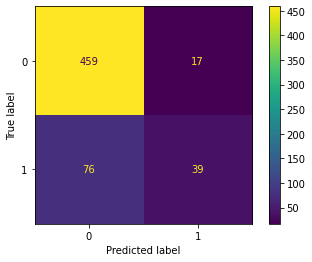

In [42]:
#SVM Hyperparameter test Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_svm_grid, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_svm.classes_)

disp.plot()
plt.show()

Berdasarkan Confusion Matrix diatas : (1 = yes 0 = no)

pengertian default payment artinya gagal bayar pinjaman yang berati bermakna negatif

1 (yes) berati default payment 
0 (no) berati tidak default payment (positif)


 - True Positif = 459

 - False Positif = 17

 - True Negatif = 39

 - False Negatif = 76

False Negatif akan sangat berbahaya karena ketika seseorang gagal bayar (defaulting) dan tidak terdeteksi oleh program maka orang itu tidak akan membayar tagihannya dan dapat merugikan bank.

Untuk False Positif disini dianggap bisa ditoleransi karena ketika bank salah menginfokan nasabah yang tidak default bahwa mereka kena default, hanya akan menyebabkan kesalahpahaman saja dan tidak berbahaya.

Presisi dan recall sangat digunakan untuk dataset yang tidak seimbang karena dalam dataset yang sangat tidak seimbang, akurasi 99% bisa menjadi tidak berarti. 

Pada kasus ini nilai recall menjadi sorotan utama. Pada base model dan model dengan hyperparameter tuning pun belum mampu mengeluarkan nilai recall yang baik. 
karena hasil SVM base model (recall = 31 %) dan hasil SVM_grid (recall = 34 % )

Maka hasil SVM_grid (recall = 34 % ) yang digunakan untuk evaluasi akhir.

Namun model masih dibilang sangat jauh darikata bagus karena imbalance data yang menyebabkan recall kurang dari 50%


In [43]:
# Model Saving
with open('model_scaler.pkl', 'wb') as file1:
    pickle.dump(scaler, file1)

with open('model_svm_grid.pkl', 'wb') as file2:
    pickle.dump(grid_svm, file2)

## Model Inference
Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [44]:
# Model Loading
with open('model_scaler.pkl', 'rb') as file1:
    model_scaler = pickle.load(file1)

with open('model_svm_grid.pkl', 'rb') as file2:
    model_grid_svm = pickle.load(file2)

In [45]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,2,1,2,28,0,0,0,2,2,...,35740,32684,32605,1955,3681,1300,0,1500,1200,0
1,30000,2,2,1,26,2,0,0,0,0,...,18669,15710,15308,1700,1600,700,1401,0,600,1
2,130000,1,2,2,33,1,-1,0,-1,0,...,11,1011,381,870,300,11,1000,300,500,0
3,50000,2,2,2,32,0,0,2,2,2,...,45795,44929,48179,4000,0,3400,0,4000,0,1
4,80000,1,2,2,30,0,0,2,-1,-1,...,61302,0,0,33000,56,62877,0,41150,81000,0
5,390000,2,1,2,27,2,2,0,0,0,...,374302,395430,384825,0,16000,15000,29000,0,12000,1
6,70000,1,1,2,31,0,0,0,0,0,...,63341,64694,67905,6000,5000,10000,3000,5000,3000,0
7,150000,2,2,2,25,0,0,0,0,0,...,103062,83567,85098,5000,3500,3000,3000,3100,3100,0
8,370000,1,1,2,30,0,0,0,0,0,...,295747,250158,255956,13000,11000,15000,10000,10000,12000,0
9,210000,2,1,2,26,0,0,0,0,0,...,18915,19359,21604,3487,10000,2000,1000,3000,1000,0


In [46]:
#Dropping the target so the data inference can predict it
X_data = data_inf.drop(['default_payment_next_month'], axis=1)
X_data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000,2,1,2,28,0,0,0,2,2,...,40805,35740,32684,32605,1955,3681,1300,0,1500,1200
1,30000,2,2,1,26,2,0,0,0,0,...,21520,18669,15710,15308,1700,1600,700,1401,0,600
2,130000,1,2,2,33,1,-1,0,-1,0,...,390,11,1011,381,870,300,11,1000,300,500
3,50000,2,2,2,32,0,0,2,2,2,...,43121,45795,44929,48179,4000,0,3400,0,4000,0
4,80000,1,2,2,30,0,0,2,-1,-1,...,19476,61302,0,0,33000,56,62877,0,41150,81000
5,390000,2,1,2,27,2,2,0,0,0,...,375899,374302,395430,384825,0,16000,15000,29000,0,12000
6,70000,1,1,2,31,0,0,0,0,0,...,55961,63341,64694,67905,6000,5000,10000,3000,5000,3000
7,150000,2,2,2,25,0,0,0,0,0,...,101572,103062,83567,85098,5000,3500,3000,3000,3100,3100
8,370000,1,1,2,30,0,0,0,0,0,...,285705,295747,250158,255956,13000,11000,15000,10000,10000,12000
9,210000,2,1,2,26,0,0,0,0,0,...,17950,18915,19359,21604,3487,10000,2000,1000,3000,1000


In [47]:
# Feature Scaling 
data_inf_scaled = model_scaler.transform(X_data)

In [48]:
#Predicting data inference using svm_hyperparameter
y_pred_inf = model_grid_svm.predict(data_inf_scaled)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
#Showing the prediction as a table
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Payment - Prediction'])
y_pred_inf_df

,Payment - Prediction
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [50]:
#Merge it together
data_concat = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_concat

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Payment - Prediction
0,80000,2,1,2,28,0,0,0,2,2,...,32684,32605,1955,3681,1300,0,1500,1200,0,0
1,30000,2,2,1,26,2,0,0,0,0,...,15710,15308,1700,1600,700,1401,0,600,1,1
2,130000,1,2,2,33,1,-1,0,-1,0,...,1011,381,870,300,11,1000,300,500,0,0
3,50000,2,2,2,32,0,0,2,2,2,...,44929,48179,4000,0,3400,0,4000,0,1,0
4,80000,1,2,2,30,0,0,2,-1,-1,...,0,0,33000,56,62877,0,41150,81000,0,0
5,390000,2,1,2,27,2,2,0,0,0,...,395430,384825,0,16000,15000,29000,0,12000,1,0
6,70000,1,1,2,31,0,0,0,0,0,...,64694,67905,6000,5000,10000,3000,5000,3000,0,0
7,150000,2,2,2,25,0,0,0,0,0,...,83567,85098,5000,3500,3000,3000,3100,3100,0,0
8,370000,1,1,2,30,0,0,0,0,0,...,250158,255956,13000,11000,15000,10000,10000,12000,0,0
9,210000,2,1,2,26,0,0,0,0,0,...,19359,21604,3487,10000,2000,1000,3000,1000,0,0


In [51]:
data_inf_pred = data_concat[['default_payment_next_month','Payment - Prediction']]
data_inf_pred

,default_payment_next_month,Payment - Prediction
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


Dari tabel di atas, bisa dilihat bahwa prediksi mendapat benar 8 dari 10 data
namun yang perlu kita lihat adalah 

data 0 mendapatkan skor 7/7
data 1 mendapatkan skor 1/3

alasannya 1 mendapatkan skor 1/3 disebabkan oleh adanya imbalance pada data dimana data(0) jauh lebih banyak daripada data (1).

## Pengambilan Kesimpulan

Berdasarkan Confusion Matrix : (1 = yes 0 = no)

pengertian default payment artinya gagal bayar pinjaman yang berati bermakna negatif

1 (yes) berati default payment 
0 (no) berati tidak default payment (positif)


 - True Positif = 459

 - False Positif = 17

 - True Negatif = 39

 - False Negatif = 76

False Negatif akan sangat berbahaya karena ketika seseorang gagal bayar (defaulting) dan tidak terdeteksi oleh program maka orang itu tidak akan membayar tagihannya dan dapat merugikan bank.

Untuk False Positif disini dianggap bisa ditoleransi karena ketika bank salah menginfokan nasabah yang tidak default bahwa mereka kena default, hanya akan menyebabkan kesalahpahaman saja dan tidak berbahaya.

Presisi dan recall sangat digunakan untuk dataset yang tidak seimbang karena dalam dataset yang sangat tidak seimbang, akurasi 99% bisa menjadi tidak berarti. 

Pada kasus ini nilai recall menjadi sorotan utama. Pada base model dan model dengan hyperparameter tuning pun belum mampu mengeluarkan nilai recall yang baik. 
karena hasil SVM base model (recall = 31 %) dan hasil SVM_grid (recall = 34 % )

Maka hasil SVM_grid (recall = 34 % ) yang digunakan untuk evaluasi akhir.

Namun model masih dibilang sangat jauh dari kata bagus karena imbalance data yang menyebabkan recall kurang dari 50% perlunya improvement pada model untuk memperbagus recall


### Metrics Model

- Penilaian cross validation dari base model ditarik dari rerata akurasi prediksi tiap base model. Hasil yang terbaik adalah model SVM

- Model SVM menjadi base model terbaik karena memang model ini meiliki kelebihan dapat memprediksi target dengan fitur lebih dari 2 karena adanya komponen separator kelas yang baik seperti clear margin.

- Hyperparameter terbaik dari model SVM adalah C=1 dan gamma=0.1 pada kernel RBF.

- Metrics evaluasi model SVM, salah satunya metrics akurasi menunjukkan angka yang cukup baik dengan persentase 81.94%
namun dalam kasus ini yang yang difokuskan adalah recall
dan SVM_Grid dengan recall = 34 %  yang digunakan untuk evaluasi akhir.

- Namun model masih dibilang sangat jauh darikata bagus karena imbalance data yang menyebabkan recall kurang dari 50%

- F1-score data 0 lebih tinggi daripada data 1 karena adanya imbalance pada target data.

### Improvement Suggestion

Improvement yang dapat diterapkan untuk machine learning ini adalah adanya menggunakan hyperparamter yang memfokuskan pada recall. agar score recall menjadi lebih baik lagi

### Insight EDA 


- default_payment_next_month memiliki korelasi yang kuat dengan kolom pay_0 karena isi nya berupa boolean 0 atau 1 dan kolom pay_0 berisi deskripsi status (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above).

- Presentase default payment dengan 78.6% nya adalah 0 (no) dan 21.4% nya adalah 1 (yes).

- Untuk limit balance, saya dapat melihat bahwa kebanyakan orang memiliki limit di bawah 100.000 Dengan saldo batas bawah, saya dapat menyimpulkan bahwa mereka memiliki gaji yang masih rendah membuat beberapa dari mereka tidak dapat membayar semua tagihan mereka.

- Wanita lebih sering menggunakan kartu kredit daripada pria

- Orang yang belum menikah (single) lebih banyak menggunakan kartu kredit daripada yang sudah menikah

- Lulusan S1 (univesity) lebih sering menggunakan kartu kredit daripada Lulusan S2 (Graduate School) dan SMA


### **Concepts :**
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
- Fungsi parameter criterion pada Decision Tree adalah untuk menghitung / mengukur kualitas split dalam Decision Tree-nya. 

- Salah satu criterion yang saya pahami adalah Gini-Impurity yaitu perhitungan berapa banyak titik data yang benar di bagian/area, jadi semakin rendah Gini-Impurity semakin baik kategorisasi datanya, Nilai minimal gini adalah 0 yang berarti perfectly pure sehingga tidak akan dibagi lagi nodenya.

2. Apakah fungsi dari pruning pada Tree model?
- Pruning berfungsi untuk menyederhanakan decision tree yang kompleks dengan menghapus bagian pohon/node yang tidak kritis dan berlebihan dalam membagi kelas/label.

- Terdapat 2 teknik yaitu pre-pruning dan post-pruning.
- pre-pruning untuk menghindari overfitting
- post-pruning mempertimbangkan subtrees dari full tree dan menggunakan cross-validated metric untuk menilai setiap subtree.

3. Bagaimana cara memilih K yang optimal pada KNN?
- K optimal pada KNN model dapat dicari menggunakan metode elbow dengan sumbu x adalah jumlah k dan sumbu y adalah rata-rata dispersi. 
Grafik elbow ini akan menunjukkan seiring bertambahnya jumlah k, maka dispersi semakin menurun.
- Nilai K optimal yang biasanya ditemukan adalah akar kuadrat dari N, di mana N adalah jumlah total sampel

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
- Cross Validation adalah suatu metode untuk mengevaluasi model dengan cara mengambil sampel secara berulang untuk train dan test set. Perulangan pengambilan sampel bergantung pada nilai k dimana k adalah berapa banyak kelas dari dataset akan dibagi. Hasilnya dapat dilihat dari metriks pengukuran misalnya akurasi.


5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Metrics : TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative.

- Accuracy  : persentase total data yang terprediksi dengan benar/sesuai dengan aktual. Rumus Akurasi = (TP+TN)/(TP+FP+FN+TN).
- Precision : Persentase banyaknya data yang benar-benar positive dari total data yang terprediksi positive. Akurasi dari prediksi positive. Rumus Precision = TP/(TP + FP).
- Recall    : banyaknya data yang bisa diprediksi positive dari total data aktual positive. Rumus Recall = TP/(TP+FN).
- F1 Score  : adalah untuk menghitung keseimbangan atau balance anatar Precision dan Recall. Rumus F1-score = 2*(Recall * Precision) / (Recall + Precision).